In [9]:
#importing libraries required for dataframes, graphs and plots.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("\n\t\t\t\tAnalysis of no-shows at appointments:\n\nResearch shows that 42% of patients do not show up to their appointments. Displayed below is a hypothetical schedule of the hospital, where 42% of patients have not showed up. The data has been made in a way that majority of factors from the research that affect no-shows have been considered, with respect to income, appointment duration, and rescheduled appointments.\nNote: This schedule does not belong to any particular doctor the way it works in the main project, hence an appointment can take up a random number of timeslots.")
sample_schedule = pd.read_excel('hypothetical.xlsx') 
sample_schedule


				Analysis of no-shows at appointments:

Research shows that 42% of patients do not show up to their appointments. Displayed below is a hypothetical schedule of the hospital, where 42% of patients have not showed up. The data has been made in a way that majority of factors from the research that affect no-shows have been considered, with respect to income, appointment duration, and rescheduled appointments.
Note: This schedule does not belong to any particular doctor the way it works in the main project, hence an appointment can take up a random number of timeslots.


,Timeslot,Name,Age,Income (Lakhs),Rescheduling?,Showed up?
0,09:00:00,Akshaya,30,11,No,1
1,09:30:00,Akshaya,30,11,No,1
2,10:00:00,Akash,25,5,No,0
3,10:30:00,Akash,25,5,No,0
4,11:00:00,Sanchitha,20,7,No,0
5,11:30:00,Riya,55,17,No,1
6,12:00:00,Pranjal,23,8,Yes,0
7,12:30:00,Pranjal,23,8,Yes,0
8,13:00:00,Siddiq,39,15,No,1
9,13:30:00,Siddiq,39,15,No,1


In [10]:
print("\nRemoving repeating timeslots, adding a new column for durations instead.")
name_list=sample_schedule["Name"].tolist()
count=dict()
times=[]
timess=[]
for i in name_list:
    count[i]=count.get(i,0)+1
times=list(count.values())
for i in times:
    timess.append(i/2)
sample_schedule.drop_duplicates(subset ="Name", keep = 'first', inplace = True) 
sample_schedule["Duration (hours)"]=timess
sample_schedule


Removing repeating timeslots, adding a new column for durations instead.


,Timeslot,Name,Age,Income (Lakhs),Rescheduling?,Showed up?,Duration (hours)
0,09:00:00,Akshaya,30,11,No,1,1.0
2,10:00:00,Akash,25,5,No,0,1.0
4,11:00:00,Sanchitha,20,7,No,0,0.5
5,11:30:00,Riya,55,17,No,1,0.5
6,12:00:00,Pranjal,23,8,Yes,0,1.0
8,13:00:00,Siddiq,39,15,No,1,2.0
12,15:00:00,Shraavya,35,10,Yes,1,1.0
14,16:00:00,Anirudh,29,7,No,0,0.5
15,16:30:00,Krishna Prasad,29,12,Yes,1,1.0
17,17:30:00,Prarthana,40,20,No,1,2.0



The graph below shows that 5 out of 12 people (42% approx) did not show up, indicated by '0' in blue


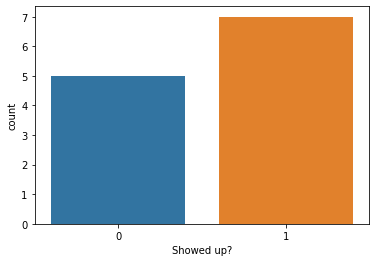

In [11]:
print("\nThe graph below shows that 5 out of 12 people (42% approx) did not show up, indicated by '0' in blue")
sns.countplot(x='Showed up?', data=sample_schedule)


The graph below is known as a box plot. It is used to find outliers, i.e. values that lie out of a normal range compared to all other values. Here, the box pot shows that one such person's age is 55. Going back to the dataframe, we see that the person aged 55 has showed up for the appointment.


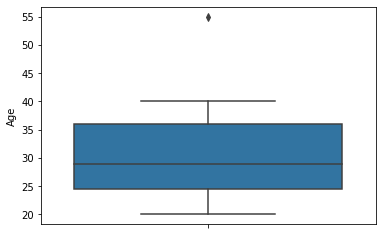

In [12]:
print("\nThe graph below is known as a box plot. It is used to find outliers, i.e. values that lie out of a normal range compared to all other values. Here, the box pot shows that one such person's age is 55. Going back to the dataframe, we see that the person aged 55 has showed up for the appointment.")
sns.boxplot(y='Age', data=sample_schedule)


Next, we check if other older people (like the outlier) have also tended to mostly show up to the appointment.

Observing the plot below, we can conclude that most people who don't show up to their appointments are young, i.e. below 30 years of age, are very commonly seen not to show up, whereas people aged slightly higher than 30 are more regular in visiting their doctors. It is also to be noted that a large percentage of people who do not show up, are also people who seemed to have chosen 'yes' for rescheduling. The likely inference from this is that younger people are less keen on getting their check-ups done, and those who have opted for rescheduling may have done so because of uncertainty of ttheir availability, which later might have not worked out in their favour.


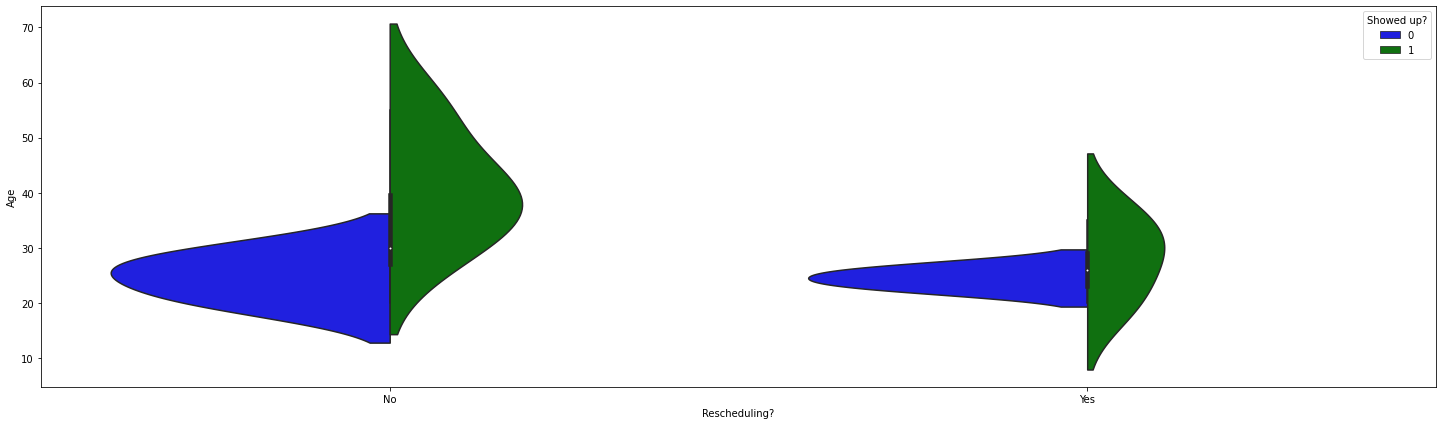

In [13]:
print("\nNext, we check if other older people (like the outlier) have also tended to mostly show up to the appointment.")
print("\nObserving the plot below, we can conclude that most people who don't show up to their appointments are young, i.e. below 30 years of age, are very commonly seen not to show up, whereas people aged slightly higher than 30 are more regular in visiting their doctors. It is also to be noted that a large percentage of people who do not show up, are also people who seemed to have chosen 'yes' for rescheduling. The likely inference from this is that younger people are less keen on getting their check-ups done, and those who have opted for rescheduling may have done so because of uncertainty of ttheir availability, which later might have not worked out in their favour.")
fig = plt.figure(figsize=(25, 7))
sns.violinplot(x='Rescheduling?', y='Age',hue='Showed up?', data=sample_schedule,split=True,palette={0: "b", 1: "g"});


Given below is a representation called a heatmap. It shows the level of relationship between the variables in the dataframe, where light to dark signifies more correlation to less correlation.
The heatmap here shows us that there is a 74% correlation between Age and income of the person. This means, a persons age is directly proportional to his income 74% of the time in the hypothetical schedule. We also know from the previous plot that age is a major factor in whether people show up or not to their appointments. IF income has a strong correlation with age, the same can be assumed for income as well.

Hence we infer that sometimes a person's income could affect their showing up as well (as shown in the heatmap, they have a 69% correlation). This is mostly due to the fact that lower income groups will have issues with transport, medication etc


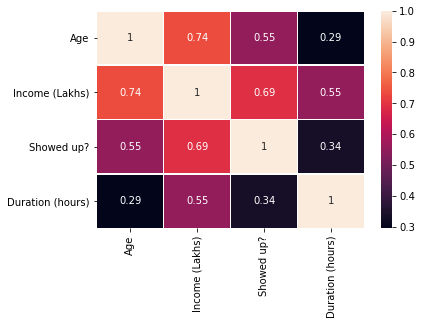

In [14]:
print("\nGiven below is a representation called a heatmap. It shows the level of relationship between the variables in the dataframe, where light to dark signifies more correlation to less correlation.\nThe heatmap here shows us that there is a 74% correlation between Age and income of the person. This means, a persons age is directly proportional to his income 74% of the time in the hypothetical schedule. We also know from the previous plot that age is a major factor in whether people show up or not to their appointments. IF income has a strong correlation with age, the same can be assumed for income as well.")
print("\nHence we infer that sometimes a person's income could affect their showing up as well (as shown in the heatmap, they have a 69% correlation). This is mostly due to the fact that lower income groups will have issues with transport, medication etc")
sns.heatmap(sample_schedule.corr(), annot=True, linewidth=0.5)


Lastly, we look at duration as a factor as well, for affecting the scenario at hand.

From the green part of the plot given below, we can see clearly that there was no one who cancelled who had a long duration appointment, and those who had shorter durations were the only ones to cancel.
This is possibly because some patients may tend to ignore or forget their general check up appointments which aren't as crucial to them as they may last only 30 mins to 1 hour. 


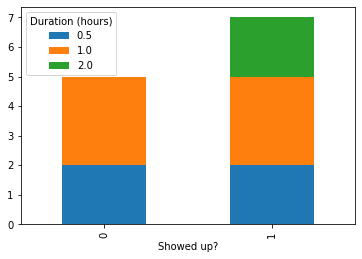

In [15]:
print("\nLastly, we look at duration as a factor as well, for affecting the scenario at hand.\n\nFrom the green part of the plot given below, we can see clearly that there was no one who cancelled who had a long duration appointment, and those who had shorter durations were the only ones to cancel.\nThis is possibly because some patients may tend to ignore or forget their general check up appointments which aren't as crucial to them as they may last only 30 mins to 1 hour. ")
pd.crosstab(sample_schedule['Showed up?'],sample_schedule['Duration (hours)']).plot(kind='bar', stacked=True)


In [16]:
print("\nHence it can be concluded that while there are several factors that affect why a patient may not appear for their self-scheduled appointments mainly,\n\nAge\nDuration of appointment\nIncome\nInconvenient schedule,\n\nthe analysis shows that there is definitely scope for overbooking which can be looked into in the near future along with ways to deal with avoiding such circumstances as well.")


Hence it can be concluded that while there are several factors that affect why a patient may not appear for their self-scheduled appointments mainly,

Age
Duration of appointment
Income
Inconvenient schedule,

the analysis shows that there is definitely scope for overbooking which can be looked into in the near future along with ways to deal with avoiding such circumstances as well.
